In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os 
plt.rcParams['image.cmap'] = 'gist_earth'


In [2]:
os.chdir('..') # move to parent directory in order to load module
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

(1, 8, 256, 256, 1)


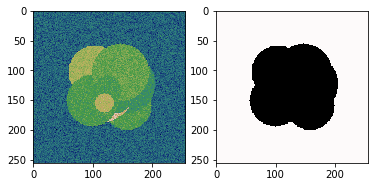

In [3]:
# generate sample image stack (1,8,256,256,1)<- NDHWC format
nx = 256
ny = 256
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20, depth_3d=8) 
x_test, y_test = generator(1)
print(x_test.shape)
plt.subplot(121)
plt.imshow(x_test[0,0,...,0])
plt.subplot(122)
plt.imshow(y_test[0,0,...,0])

In [4]:
net = unet.Unet3D(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)
prediction = net.predict("./unet_trained/model.cpkt", x_test)

2018-02-24 23:21:43,947 Layers 3, features 16, filter size 3x3, pool size: 2x2
2018-02-24 23:21:47,161 Removing 'D:\PythonProject\tf_unet\prediction'
2018-02-24 23:21:47,162 Removing 'D:\PythonProject\tf_unet\unet_trained'
2018-02-24 23:21:47,163 Allocating 'D:\PythonProject\tf_unet\prediction'
2018-02-24 23:21:47,165 Allocating 'D:\PythonProject\tf_unet\unet_trained'
2018-02-24 23:22:19,264 Verification error= 21.9%, loss= 0.6636
2018-02-24 23:22:22,192 Start optimization
2018-02-24 23:23:15,902 Iter 0, Minibatch Loss= 0.5445, Training Accuracy= 0.2339, Minibatch error= 22.5%
2018-02-24 23:24:53,093 Iter 2, Minibatch Loss= 0.5248, Training Accuracy= 0.2236, Minibatch error= 22.6%
2018-02-24 23:26:30,668 Iter 4, Minibatch Loss= 0.4092, Training Accuracy= 0.2207, Minibatch error= 21.3%
2018-02-24 23:28:08,833 Iter 6, Minibatch Loss= 0.8409, Training Accuracy= 0.2061, Minibatch error= 23.6%
2018-02-24 23:29:44,212 Iter 8, Minibatch Loss= 0.6825, Training Accuracy= 0.0354, Minibatch error

2018-02-25 01:11:11,369 Iter 130, Minibatch Loss= 0.5457, Training Accuracy= 0.2266, Minibatch error= 23.6%
2018-02-25 01:12:48,513 Iter 132, Minibatch Loss= 0.5258, Training Accuracy= 0.2256, Minibatch error= 22.0%
2018-02-25 01:14:25,474 Iter 134, Minibatch Loss= 0.5376, Training Accuracy= 0.2168, Minibatch error= 22.9%
2018-02-25 01:16:02,672 Iter 136, Minibatch Loss= 0.5357, Training Accuracy= 0.2180, Minibatch error= 22.9%
2018-02-25 01:17:39,479 Iter 138, Minibatch Loss= 0.5368, Training Accuracy= 0.2217, Minibatch error= 23.0%
2018-02-25 01:18:23,664 Epoch 6, Average loss: 0.5305, learning rate: 0.1470
2018-02-25 01:18:54,678 Verification error= 21.9%, loss= 0.5229
2018-02-25 01:19:49,828 Iter 140, Minibatch Loss= 0.5406, Training Accuracy= 0.2302, Minibatch error= 23.4%
2018-02-25 01:21:25,803 Iter 142, Minibatch Loss= 0.5121, Training Accuracy= 0.2327, Minibatch error= 21.3%
2018-02-25 01:23:01,371 Iter 144, Minibatch Loss= 0.5277, Training Accuracy= 0.2166, Minibatch error= 2

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2018-02-25 02:08:50,842 Restoring parameters from ./unet_trained/model.cpkt
2018-02-25 02:08:51,067 Model restored from file: ./unet_trained/model.cpkt


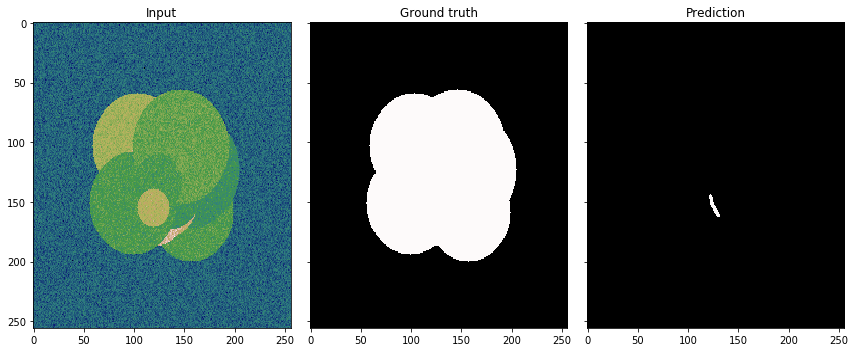

In [7]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,0,...,0], aspect="auto")
ax[1].imshow(y_test[0,0,...,1], aspect="auto")
mask = prediction[0,0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("docs/toy_problem.png")